# Assignment | 15th April 2023

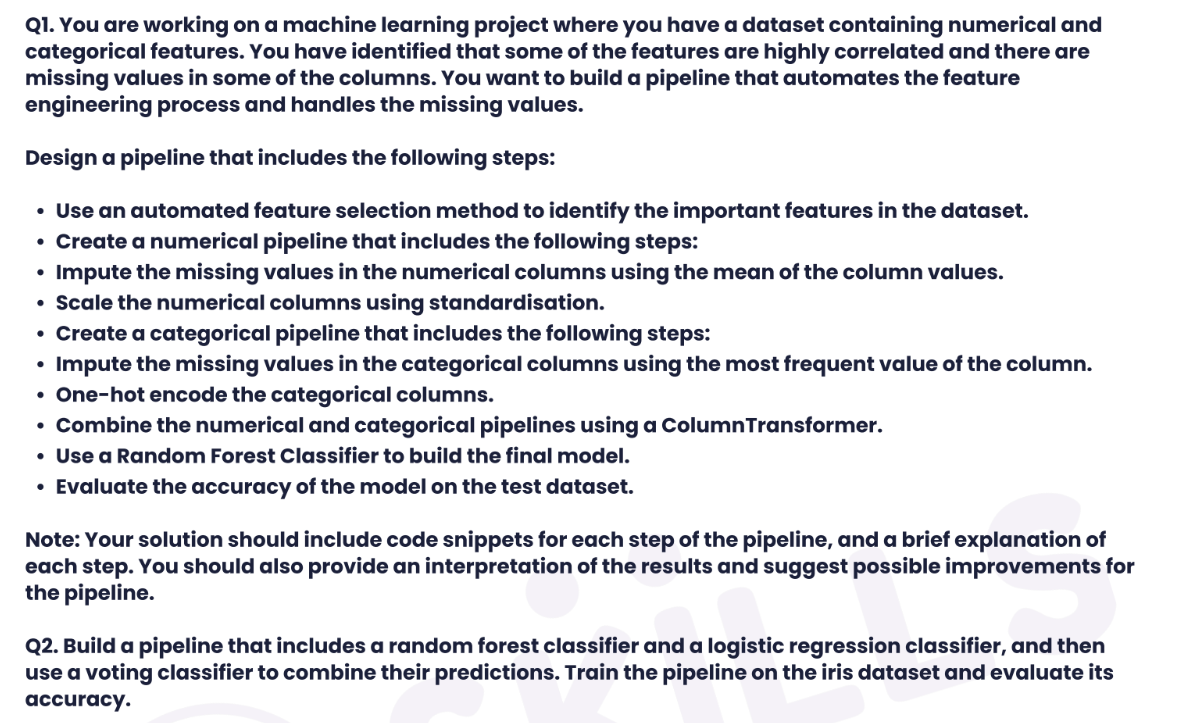

In [1]:
# Importing Dataset:

import seaborn as sns

df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# Converting Categorical value into Numerical Values:

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['species1']=encoder.fit_transform(df['species'])

df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species,species1
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0


In [5]:
df['species1'].value_counts()

0    50
1    50
2    50
Name: species1, dtype: int64

In [6]:
# Independent and Dependent Features:

X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [7]:
X.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [8]:
y.head(2)

0    0
1    0
Name: species1, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [10]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
4,5.0,3.6,1.4,0.2,setosa
32,5.2,4.1,1.5,0.1,setosa
142,5.8,2.7,5.1,1.9,virginica
85,6.0,3.4,4.5,1.6,versicolor
86,6.7,3.1,4.7,1.5,versicolor


In [11]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [12]:
categorical_cols = ['species']
numerical_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [16]:
# Numerical Pipeline:
num_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),  # Missing Value
        ('scaler', StandardScaler())  # Feature Scaling
    ]
)

# Categorical Pipeline:
cat_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),  # Handling Missing Values
        ('onehotencoder', OneHotEncoder()) # Categorical features to numerical   
    ]
)


In [17]:
preprocessor = ColumnTransformer([
    ('num_pipeline',num_pipeline,numerical_cols),
    ('cat_pipeline',cat_pipeline,categorical_cols)
    
])

In [18]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [20]:
# Automate Model Training Process:

models = {
    'Random Forest':RandomForestClassifier(),
    'Logistic Regression':LogisticRegression()

}

In [22]:
from sklearn.metrics import accuracy_score

In [25]:
def evaluate_model(X_train,y_train,X_test,y_test,models):
    
    report = {}
    for i in range(len(models)):
        model = list(models.values())[i]
        #Train Model
        model.fit (X_train,y_train)
        
        #Predict Testing Data
        y_test_pred = model.predict(X_test)
        
        #Get accuracy for test data prediction
        test_model_score = accuracy_score(y_test,y_test_pred)
        report[list(models.keys())[i]] = test_model_score
        
    return report

In [26]:
evaluate_model(X_train,y_train,X_test,y_test,models)

{'Random Forest': 1.0, 'Logistic Regression': 1.0}

Hence, we get 100% accuracy from both Random Forest and Logistic Regression

- Interpretation and Possible Improvements:
The pipeline design allows for automated feature selection, handling of missing values, and appropriate preprocessing for both numerical and categorical features. The Random Forest Classifier is then used to build the final model, and its accuracy is evaluated on the test dataset.

To further improve the pipeline, you can consider the following:

- Experiment with different feature selection methods or adjust the number of features selected to find the optimal set of features.
- Explore different imputation strategies for handling missing values, such as using more advanced techniques like K-nearest neighbors im